# ***VERİ ÖN İŞLEME GENEL BAKIŞ***

**"Eğer veriniz kötü ise makine öğrenmesi araçlarınız kullanışsız olacaktır"**

Bir makine öğrenmesinin amacı genellenebilir yapılar ortaya koymaktır. Belirli olaylar gözlemlendiğinde belirli tahmin sonuçları vermektir.  Yani model veriden beslenmektedir. Bu nedenle veri ön işleme adımları oldukça önemlidir.

* ***Veri Temizleme (Data Cleaning)***
    * Gürültülü Veri (Cinsiyeti erkek olan birinin hamilelik durumunun Evet olması gibi, yanlış veri ya da bebek biberonunun 1 mio TL olması gibi)
    * Aykırı Veri  
    * Eksik veri


* ***Veri Standardizasyonu***
    * 0-1 dönüşümü
    * z-Skoru dönüşümü
    * Logaritmik dönüşüm


* ***Veri İndirgeme***
    * Gözlem Sayısının Azaltılması
    * Değişken Sayısının Azaltılması
    
    
* ***Değişken Dönüştürme***
    * Sürekli Değişkenlerde Dönüşümler 
    * Kategorik Değişkenlerde Dönüşümler (One hot encoder ya da label encoding, ordinal verilerin sıralamalarının düzenlenmesi gibi..)


# ***Veri Temizleme***

***AYKIRI GÖZLEM ANALİZİ (OUTLIER DETECTION)***

Aykırı Değer, aykırılığı ifade eden numeric değerdir. 

Aykırı değeri barındıran gözlem birimine ***Aykırı Gözlem*** denir.  Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemler olarak da adlandırılabilir.

***Aykırı Değer Neye Sebep Olur?***

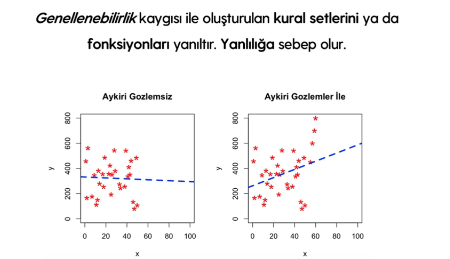

***Aykırı Değerleri Nasıl Anlarız?***

***_Amacımız genellenebilir, veri setinin içindeki yapıları temsil etme yeteneği yüksek yansız modeller oluşturmak!_*** 

Veri setinin genel eğiliminin dışına çıktığını nasıl anlarız?

* ***Sektör dinamiklerine göre:*** Örneğin ev fiyat tahmin modelinde 1000 m2 lik evlerin (çok seyrek,oransal olarak max %1 seviyesinde) genellenebilirliğin dışında olması gibi.. Bu gözlemlerin modellemeye dahil edilmesi daha düşük fiyatlı evlerin tahmin edilmesinde genellenebilir yapıyı bozmaktadır. Dikkate değer noktaların tespit edilmesini kaçırmaya sebep olmaktadırç
    
* ***Standart Sapma Yaklaşımı:*** Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir; 1,2 ya da 3 std sapma değeri ort üzerine eklenerek ortaya çıkan bu değer eşik değer olarak adlandırılır. Bu değerden aşağıda ya da yukarıda kalan değerler aykırı değer olarak nitelendirilebilir.

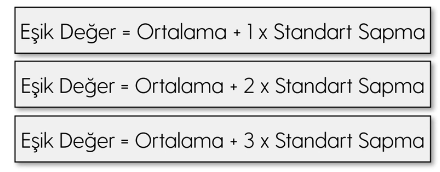

* ***z-Skoru Yaklaşımı:*** Std sapmaya benzer şekilde çalışır. Değişken std normal dağılıma uyarlanıri yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+2.5 değerine göre bir eşik değer belirlenerek bu eşik değerinde altında ya da üstünde kalan aykırı değerler tespit edilir.

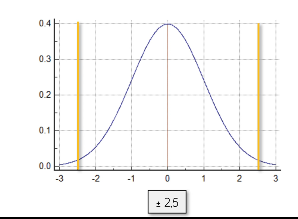
    
* ***Boxplot Yöntemi (interquantile range-IQR):*** Bir değişkenin değerleri küçükten büyüğe sıralanıri değişkenin çeyrekliklerine karşılık gelen Q1 ve Q3 değerlerine karşılık gelen değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

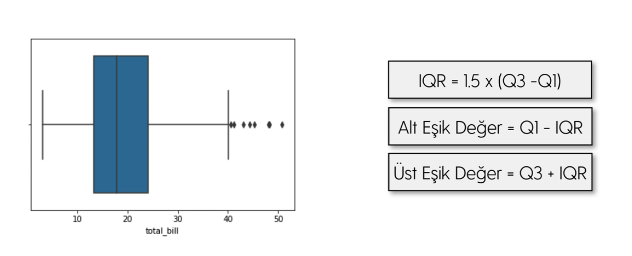

***Aykırı Değerleri Yakalamak***


In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

#Sayısal değişkenlere erişelim:
df = diamonds.select_dtypes(["int64","float64"])

#Şimdilik NA değerlerle ilgilenmiyoruz; sadece aykırı değerlerle işlem yapacağız
df.dropna()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.isna().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [4]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#Değişkenlerden sadece bir tanesini seçip inceleyelim (table değişkeni)

df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [6]:
#Uyarı mesajlarını kapamak için:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore",category=FutureWarning  )
 

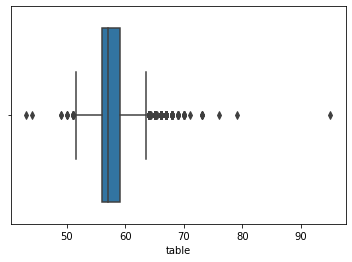

In [159]:
#Box plot yöntemi ile görselleştirelin:

sns.boxplot(df["table"]);

In [7]:
#Eşik değer belirlememiz gerekiyor:

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

IQR = Q3- Q1


In [8]:
print(Q1)

56.0


In [9]:
print(Q3)

59.0


In [10]:
print(IQR)

3.0


In [11]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [165]:
print(alt_sinir)
print(ust_sinir)

51.5
63.5


In [166]:
df_table<alt_sinir 

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [167]:
df_table>ust_sinir

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [168]:
aykiri_deger =( (df_table<alt_sinir) | (df_table>ust_sinir) ).dropna()

In [169]:
aykiri_deger.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [170]:
aykiri_df = df_table[aykiri_deger]

In [171]:
aykiri_df.index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

***Aykırı Değer Problemini Çözmek***

* 1.Yöntem: Probleme göre aykırı değerler silinerek çalışma dışında bırakılabilir.

* 2.Yöntem: Ortalama ile doldurma

* 3.Yöntem : Baskılama

_***Silme Yöntemi ile Çözme***_

In [58]:
#İşlemleri yapabilmek için dataframe'e çevirmeliyiz:

import pandas as pd

#Orjinal veri setimiz:
df_table = pd.DataFrame(df_table)



pandas.core.frame.DataFrame

In [60]:
df_table.shape

(53940, 1)

In [132]:
#Aykiri değerleri içermeyen dataframe oluşturalım:

t_df = df_table[~aykiri_deger]

In [133]:
t_df["table"].min()

51.6

In [134]:
t_df["table"].max()

63.5

In [135]:
#Aykırı gözlem sonrasında;

t_df.shape

(53940, 1)

_***Ortalama ile Doldurma***_

In [176]:
import pandas as pd
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

#Sayısal değişkenlere erişelim:
df = diamonds.select_dtypes(["int64","float64"])

#Şimdilik NA değerlerle ilgilenmiyoruz; sadece aykırı değerlerle işlem yapacağız
df.dropna()

df_table = df["table"]

df_table = pd.DataFrame(df_table)


In [178]:
#Aykırı değerlerimizin olduğu df:

aykiri_df = aykiri_df.dropna()
aykiri_df.head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [187]:
#Ortalama ile dolduralım:

df_table[aykiri_deger] = df_table["table"].mean()

In [189]:
df_table["table"].min()

51.6

In [190]:
df_table["table"].max()

63.5

***Baskılama Yöntemi***

Aykırılar yakalandıktan sonra üst sınır değerini aşıyorsa üst sınır değeri ile alt sinirin altında kalıyorsa alt sinir ile doldurulur.

In [197]:
import pandas as pd
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

#Sayısal değişkenlere erişelim:
df = diamonds.select_dtypes(["int64","float64"])

#Şimdilik NA değerlerle ilgilenmiyoruz; sadece aykırı değerlerle işlem yapacağız
df.dropna()

df_table = df["table"]
df_table = pd.DataFrame(df_table)

df_table.sort_values("table").head()

,table
11368,43.0
35633,44.0
5979,49.0
22701,49.0
25179,50.0


In [202]:
aykiri_alt = df_table<alt_sinir

print(alt_sinir)
print(aykiri_alt.head())

51.5
   table
0  False
1  False
2  False
3  False
4  False


In [203]:
aykiri_ust = df_table>ust_sinir

print(ust_sinir)
print(aykiri_ust.head())

63.5
   table
0  False
1  False
2   True
3  False
4  False


In [205]:
df_table[aykiri_alt]= alt_sinir

In [206]:
df_table[aykiri_ust]= ust_sinir

In [12]:
df_table.sort_values("table").head(5)

ValueError: No axis named table for object type Series

In [208]:
df_table.sort_values("table",ascending=False).head(10)

,table
47953,63.5
22516,63.5
50627,63.5
43293,63.5
53757,63.5
40335,63.5
43301,63.5
52675,63.5
53756,63.5
8036,63.5


***Çok Değişkenli Aykırı Gözlem Analizi***

_***Local Outlier Factor***_

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demekki bu değer aykırı değerdir şeklinde değerlendiriliyor.


Örneğin; yaş sayısı 17,18,70,80 olsun, bu şekilde bakınca aykırı bir durum söz konusu değil. Evlilik sayısı 1,2,3 olsun, burada da bir aykırılık söz konusu değil. Ancak bu 2 değişken birlikte değerlendirildiğinde aykırı bir durum çıkabilir;

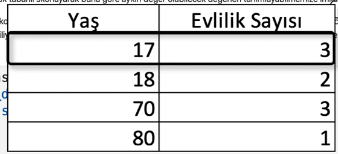

Yaşı 17 olanın evlilik sayısının 3 olması nadir görülebilecek genelleştirmeyi bozabilecek bir durumdur. Bunu çözmenin yöntemlerinden biri LOF yöntemidir.

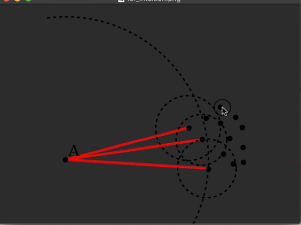

Yukarıdaki her bir noktanın (gözlem biriminin9 komşuluklarına bakarak, yoğunluk skoru hesaplanır. A gözlem birimine baktığımızda komşuluğu çok az, yoğunluk skoru düşük. Dolayısıyla A gözlemi için outlier değer olabilir diyebiliriz.

In [17]:
import pandas as pd
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

#Sayısal değişkenlere erişelim:
diamonds = diamonds.select_dtypes(["int64","float64"])
df = diamonds.copy()

df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [18]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

#komşuluk sayısı 20, yoğunluk 0.1 için LOF nesnesini tanımlayalım:

clf = LocalOutlierFactor(n_neighbors = 20, contamination=0.1)


In [19]:
#Modeli fit edelim:
    
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [20]:
#Her bir gözlem için eşik değeri kabul edilebilecek yoğunluk skorlarını bulalım:

df_scores = clf.negative_outlier_factor_

In [21]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [15]:
np.sort(df_scores)[0:10]

NameError: name 'df_scores' is not defined

Skorlar genel olarak birbirine yakın; en net düşüş -5.86 da görünüyor.

In [236]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [239]:
#Şimdi eşik değerine karar verelim, en hızlı azalış -1.33 'de gerçekleşmiş görünüyor, ancak rasgele bir değer seçip (13.değer) örnekleyelim:

esik_deger = np.sort(df_scores)[13]


In [245]:
#Eşik değerin altındaki değerler aykırı değerler:

aykiri_tf = df_scores<esik_deger

In [242]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

***Aykırı değerleri Çözümleme: Silme yöntemi***

In [247]:
#Aykırı olmayan değerler: Silme yöntemi

yeni_df = df[df_scores>esik_deger]

In [264]:
yeni_df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


***Aykırı değerleri Çözümleme: Baskılama yöntemi***

In [272]:
#Eşik değerin skoruna karşılık gelen numeric gözlem birimi:

df[df_scores==esik_deger] 


,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [249]:
# Aykırı gözlemlerin yerine yukarıdaki gözlemin değerlerini atayalım

baskilama_degeri = df[df_scores==esik_deger] 

In [254]:
aykirilar = df[aykiri_tf] 

aykirilar.head()

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37


In [258]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [261]:
#İndexlerden kurtularak bir numpy array'ine çevirelim:

res = aykirilar.to_records(index=False)

In [266]:
#res'in içindeki tüm aykırı değerleri baskı değeri ile dolduralım:

res[:] = baskilama_degeri.to_records(index=False)

res[0:10]

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [269]:
#Orjinal veri setinde aykirilar df i içerisindeki bu ayrkırı gözlemlerin yerine res arrayini yerleştirmeliyiz:

df[aykiri_tf] = pd.DataFrame(res, index=df[aykiri_tf].index)

In [270]:
df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19
